In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_colwidth", 999)

In [ ]:
df = pd.read_csv("globalterrorismdb_0617dist.csv", encoding="latin-1")

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,N

In [5]:
df.shape

(170350, 135)

In [6]:
print([col for col in df.columns])

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [7]:
df[["attacktype1_txt", "attacktype1"]].drop_duplicates()

,attacktype1_txt,attacktype1
0,Assassination,1
1,Hostage Taking (Kidnapping),6
3,Bombing/Explosion,3
4,Facility/Infrastructure Attack,7
5,Armed Assault,2
12,Hijacking,4
16,Unknown,9
298,Unarmed Assault,8
336,Hostage Taking (Barricade Incident),5


In [8]:
df["attacktype1_txt"].value_counts()

Bombing/Explosion                      83073
Armed Assault                          40223
Assassination                          18402
Hostage Taking (Kidnapping)            10233
Facility/Infrastructure Attack          9581
Unknown                                 6425
Unarmed Assault                          913
Hostage Taking (Barricade Incident)      902
Hijacking                                598
Name: attacktype1_txt, dtype: int64

In [9]:
df[["region", "region_txt"]].drop_duplicates()

,region,region_txt
0,2,Central America & Caribbean
1,1,North America
2,5,Southeast Asia
3,8,Western Europe
4,4,East Asia
6,3,South America
15,9,Eastern Europe
16,11,Sub-Saharan Africa
95,10,Middle East & North Africa
565,12,Australasia & Oceania


In [10]:
df["region_txt"].value_counts()

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

In [11]:
#priors will be all kills by Armed Assaults in Western Europe and North America.  
d_west = df["nkill"][((df['region'] == 1) | (df['region']== 8))]
d_west = [k for k in d_west if k > 0]
d_west = [k for k in d_west if k < 100]
d_west
prior_mean = np.mean(d_west)
prior_std = np.std(d_west)

print(prior_mean, prior_std)

1.7937999060591827 4.299086064013622


In [12]:
# US fatalities in Armed Assaults
us_aa_o = df["nkill"][((df['country'] == 217) & (df['attacktype1']== 2))]
us_aa_o = [k for k in us_aa_o if k > 0]

In [13]:

# Western Europe fatalities in Armed Assults
we_aa_o = df["nkill"][((df['region_txt'] == "Western Europe") & (df['attacktype1']== 2))]
we_aa_o = [k for k in we_aa_o if k > 0]

In [14]:
print(np.mean(us_aa_o), np.mean(we_aa_o))

1.7627118644067796 1.8897795591182365


In [15]:
with pm.Model() as model:
    us_aa_mean = pm.Normal('US_Armed_Assault_Mean', prior_mean, sd=50)
    we_aa_mean = pm.Normal('WE_Armed_Assault_Mean', prior_mean, sd=50)
    
    us_aa_std = pm.HalfNormal('US_Armed_Assault_STD',sd=prior_std)
    we_aa_std = pm.HalfNormal('WE_Armed_Assault_STD',sd=prior_std)
    
    US_AA = pm.Normal('US_Armed_Assault', mu = us_aa_mean, sd = us_aa_std, observed =us_aa_o )
    US_BB = pm.Normal('WE_Armed_Assault', mu = we_aa_mean, sd = we_aa_std, observed = we_aa_o)
    
    mean_delta = pm.Deterministic('mean_delta', us_aa_mean - we_aa_mean)
    std_delta = pm.Deterministic('std_delta',us_aa_std - we_aa_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((us_aa_std**2 + us_aa_std**2)/2))

In [ ]:
with model:
    trace = pm.sample(10000)

In [ ]:

pm.plot_posterior(trace,
                  varnames=['US_Armed_Assault_Mean', 'WE_Armed_Assault_Mean',
                            'US_Armed_Assault_STD', 'WE_Armed_Assault_STD'],
                  color='#87ceeb');

In [ ]:
pm.plot_posterior(trace,
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0);

In [19]:
def find_1993(df):
    bombs = []
    regions = df["region_txt"].unique()
    for r in regions:
        region = df[df["region_txt"] == r]
        region = pd.crosstab(index=region["iyear"], columns=[region["attacktype1_txt"]],margins=True)
        region.reset_index(inplace=True)
        region.drop(region.tail(1).index, inplace=True)
        region["iyear"] = region["iyear"].map(lambda x: int(x))
        region = region[(region["iyear"] >= 1983) & (region["iyear"] <= 2003)]
        year_BE = region[["iyear", "Bombing/Explosion"]]
        
        with pm.Model() as reg:
            std = pm.HalfNormal("std", sd=10) # std tf the residuals
            intercept = pm.Normal("intercept", mu=0, sd=10) #beta_0
            beta = pm.Normal("beta", mu=0, sd=10) #beta_1
            E_BE = pm.Normal("E_BE", mu=intercept + (beta * year_BE["iyear"].values), sd=std, observed=year_BE["Bombing/Explosion"].values)
            
        with reg:
            map_estimate = pm.find_MAP()
            
        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(year_BE["iyear"].values, year_BE["Bombing/Explosion"].values, alpha=0.2)
        ax.plot(year_BE["iyear"].values, map_estimate['intercept'] + year_BE["iyear"].values*map_estimate['beta'])
        plt.title("region %r" %r)
        plt.show()
        
        y = map_estimate['intercept'] + year_BE["iyear"].values*map_estimate['beta']
        pred_df = pd.DataFrame()
        pred_df["iyear"] = year_BE["iyear"]
        pred_df["pred"] = y
        pred_1992 = pred_df[(pred_df["iyear"] == 1992) | (pred_df["iyear"] == 1994)]
        bombs_1992_r = pred_1992["pred"].mean()
        bombs.append(bombs_1992_r)
    return bombs

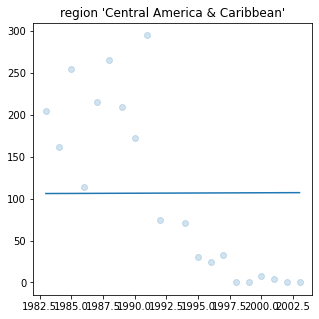

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


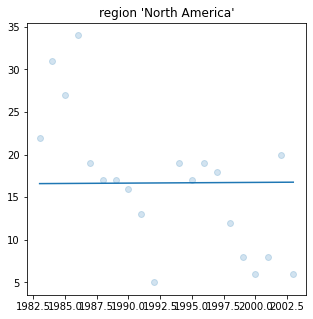

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


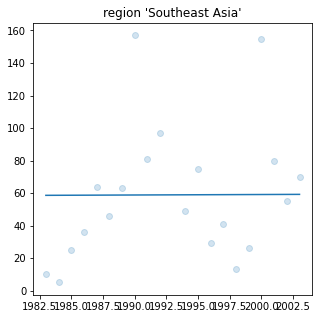

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


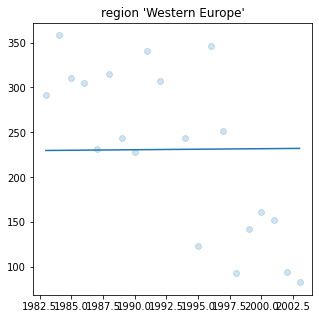

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


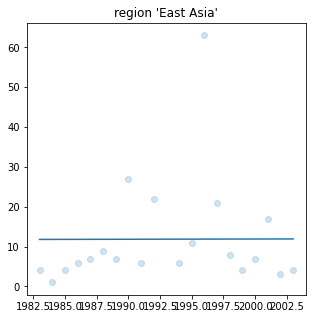

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


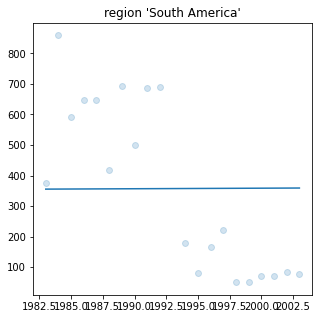

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


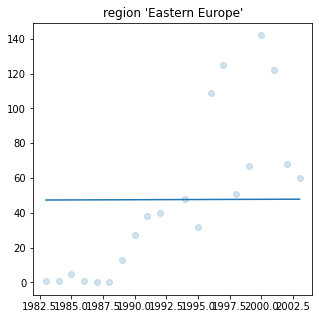

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


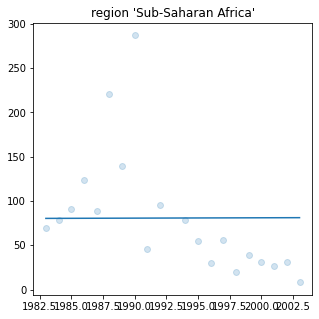

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


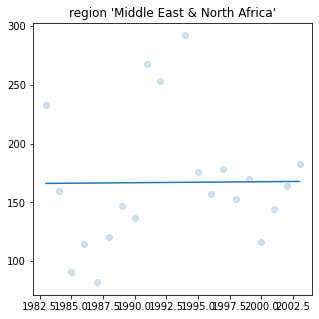

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


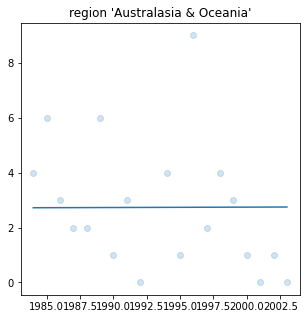

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


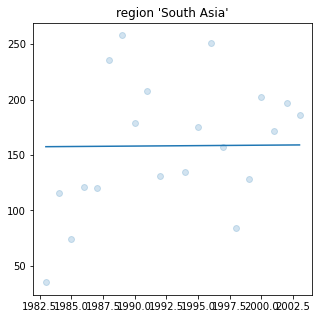

c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\stc\appdata\local\programs\python\python39\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


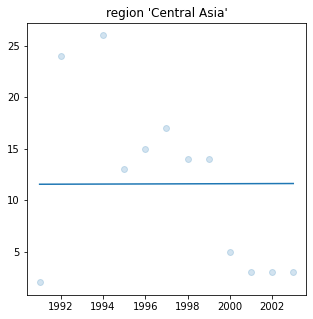

In [20]:

bombs = find_1993(df)

In [21]:
bombs

[106.68426887742744,
 16.68311622279506,
 58.884493967318335,
 231.034842474458,
 11.856507985199347,
 357.3385107995614,
 47.61148100256686,
 80.7336324547592,
 167.01575273847416,
 2.733657516085996,
 158.31436165122378,
 11.550040039507735]

In [22]:
sum(bombs)

1250.4406657293775